<a href="https://colab.research.google.com/github/anita03012005/weatherwise-jiasyuan/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🌦️ Setup and Imports for WeatherWise (using wttr.in API)

# Import required libraries
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import os

# Skip AI setup for now — not needed for weather data
os.environ['HANDS_ON_AI_SERVER'] = ''
os.environ['HANDS_ON_AI_MODEL'] = ''
os.environ['HANDS_ON_AI_API_KEY'] = ''

In [ ]:
def get_weather_data(location, forecast_days=5, timeout=10):
    import requests
    if not location or not isinstance(location, str):
        print("Error: Invalid location")
        return None

    if not 1 <= forecast_days <= 5:
        print("Error: forecast_days must be between 1 and 5")
        forecast_days = min(max(1, forecast_days), 5)

    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=timeout)
        response.raise_for_status()

        data = response.json()
        result = {
                "location": location.replace("+", " "),
                "current": {
                    "temperature": {
                        "current": int(data["current_condition"][0]["temp_C"]),
                        "feels_like": int(data["current_condition"][0]["FeelsLikeC"])
                    },
                    "condition": data["current_condition"][0]["weatherDesc"][0]["value"],
                    "humidity": int(data["current_condition"][0]["humidity"]),
                    "wind": {
                        "speed": int(data["current_condition"][0]["windspeedKmph"]),
                        "direction": data["current_condition"][0]["winddir16Point"]
                    },
                    "precipitation": float(data["current_condition"][0]["precipMM"])
                },
                "forecast": []
        }

        for i in range(min(forecast_days, len(data["weather"]))):
            day = data["weather"][i]
            forecast_day = {
                    "date": day["date"],
                    "max_temp": int(day["maxtempC"]),
                    "min_temp": int(day["mintempC"]),
                    "condition": day["hourly"][4]["weatherDesc"][0]["value"],  # Midday condition
                    "precipitation": {
                        "chance": int(day["hourly"][4]["chanceofrain"]),
                        "amount": float(day["hourly"][4]["precipMM"])
                    },
                    "wind": {
                        "speed": int(day["hourly"][4]["windspeedKmph"]),
                        "direction": day["hourly"][4]["winddir16Point"]
                    }
                }
            result["forecast"].append(forecast_day)

        return result
    except requests.exceptions.RequestException as e:
        print(f"Error retrieving weather data: {e}")
        return None
    except (KeyError, ValueError, TypeError) as e:
        print(f"Error processing weather data: {e}")
        return None

# Ask user to input ramdom city
city = input("🌏Enter a city name:")
while True:
    try:
        days = int(input("📅 How many forecast days? (1–5): "))
        if 1 <= days <= 5:
            break
        else:
            print("⚠️Please enter a number between 1 and 5")
    except ValueError:
        print("⚠️Invalid input. Please enter a number between 1 and 5")

data = get_weather_data(city,days)
if data:
    print(f"📍 Location: {data['location']}")
    print(f"🌡️ Temperature: {data['current']['temperature']['current']}°C (Feels like {data['current']['temperature']['feels_like']}°C)")
    print(f"☁️ Condition: {data['current']['condition']}")
    print(f"💧 Humidity: {data['current']['humidity']}%")
    print(f"💨 Wind: {data['current']['wind']['speed']} km/h {data['current']['wind']['direction']}")
else:
    print("❌ Failed to retrieve weather data.")

🌏Enter a city name:perth 
📅 How many forecast days? (1–5): 
⚠️Invalid input. Please enter a number between 1 and 5
📅 How many forecast days? (1–5): 
⚠️Invalid input. Please enter a number between 1 and 5
📅 How many forecast days? (1–5): 1
📍 Location: perth 
🌡️ Temperature: 20°C (Feels like 20°C)
☁️ Condition: Sunny
💧 Humidity: 43%
💨 Wind: 19 km/h SW


Enter a city:perth
Location: perth
Now: Sunny, 20°C (feels 20°C)


,date,max_temp,min_temp,condition,precipitation,wind
0,2025-10-23,19,13,Sunny,"{'chance': 0, 'amount': 0.0}","{'speed': 20, 'direction': 'SW'}"
1,2025-10-24,17,13,Light rain shower,"{'chance': 100, 'amount': 0.8}","{'speed': 35, 'direction': 'W'}"
2,2025-10-25,19,14,Partly Cloudy,"{'chance': 0, 'amount': 0.0}","{'speed': 21, 'direction': 'SW'}"


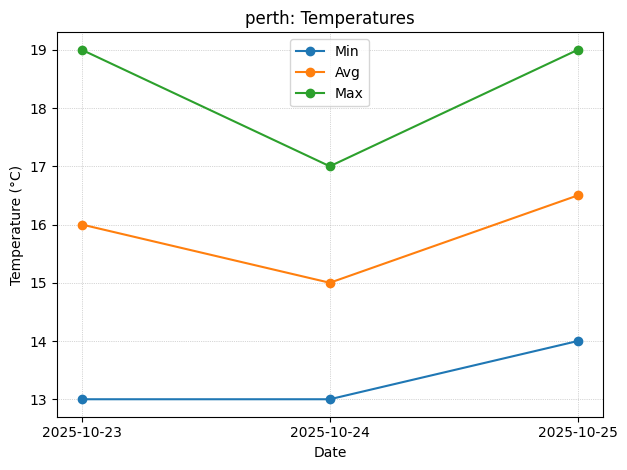

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def forecast_to_df(weather_data):
    """
    Convert forecast data from dictionary to pandas DataFrame.

    Args:
        weather_data (dict): Weather data including forecast

    Returns:
        pd.DataFrame: DataFrame containing forecast data
    """
    if weather_data and "forecast" in weather_data:
        return pd.DataFrame(weather_data["forecast"])
    return pd.DataFrame()

def create_temperature_visualisation(weather_data:dict,output_type:str = 'display'):
    # create a Dateframe from the weather_data
    df = forecast_to_df(weather_data)
    if df.empty:
        print("No forecast data to plot.")
        return None

    # create the figure for plotting
    fig = plt.figure()
    x = df["date"].astype(str)
    df["avg_temp"] = (df["min_temp"] + df["max_temp"]) / 2

    # plot minimum and maximum temperature line chart
    plt.plot(x, df["min_temp"], marker="o", label="Min")
    plt.plot(x, df["avg_temp"], marker="o", label="Avg")
    plt.plot(x, df["max_temp"], marker="o", label="Max")

    # customize chart label,title and layout
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.title(f"{weather_data.get('location', 'Location')}: Temperatures")
    plt.legend()
    plt.grid(True, linestyle=":", linewidth=0.5)
    plt.tight_layout()

    if output_type == "figure":
        return fig
    plt.show()
    return None

# Ask user to input a city
city = input ("Enter a city:").strip()

try:
    data = get_weather_data(city, forecast_days=5)
    if not data:
        print("Failed to fetch data. Try another city.")
    else:
        print(f"Location: {data['location']}")
        cur = data["current"]
        print(f"Now: {cur['condition']}, {cur['temperature']['current']}°C (feels {cur['temperature']['feels_like']}°C)")
        df = forecast_to_df(data)
        display(df)  # shows tidy table
        # optional quick charts:
        create_temperature_visualisation(data)

except Exception as e:
    print("Error:", e)



Enter a city:perth
Location: perth
Now: Sunny, 20°C (feels 20°C)


,date,max_temp,min_temp,condition,precipitation,wind
0,2025-10-23,19,13,Sunny,"{'chance': 0, 'amount': 0.0}","{'speed': 20, 'direction': 'SW'}"
1,2025-10-24,17,13,Light rain shower,"{'chance': 100, 'amount': 0.8}","{'speed': 35, 'direction': 'W'}"
2,2025-10-25,19,14,Partly Cloudy,"{'chance': 0, 'amount': 0.0}","{'speed': 21, 'direction': 'SW'}"


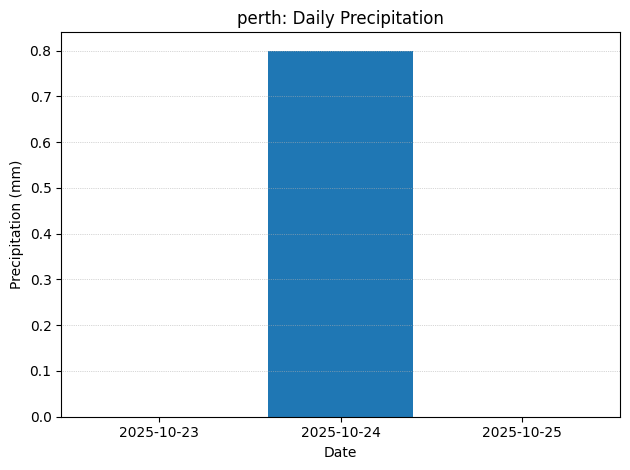

In [ ]:

import requests
import matplotlib.pyplot as plt
import pandas as pd

def create_precipitation_visualisation(weather_data: dict, output_type: str = 'display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """

    # create a Dateframe from the weather_data
    df = forecast_to_df(weather_data)
    if df.empty:
        print("No forecast data to plot.")
        return None

    # identify precipitation column
    if 'precip_mm' in df.columns:
        y = pd.to_numeric(df['precip_mm'], errors='coerce').fillna(0.0)
    elif 'precipitation' in df.columns:
        y = df['precipitation'].apply(
            lambda d: float(d.get('amount', 0)) if isinstance(d, dict) else 0.0
        )
    else:
        print("No precipitation column found in DataFrame.")
        return None

    x = df['date'].astype(str)

    # plot the precipitation figure
    fig = plt.figure()
    plt.bar(x, y)
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.title(f"{weather_data.get('location','Location')}: Daily Precipitation")
    plt.grid(True, axis='y', linestyle=':', linewidth=0.5)
    plt.tight_layout()

    # display the figure
    if output_type == 'figure':
        return fig
    plt.show()
    return None

# Ask user to input a city
city = input ("Enter a city:").strip()

try:
    data = get_weather_data(city, forecast_days=5)
    if not data:
        print("Failed to fetch data. Try another city.")
    else:
        print(f"Location: {data['location']}")
        cur = data["current"]
        print(f"Now: {cur['condition']}, {cur['temperature']['current']}°C (feels {cur['temperature']['feels_like']}°C)")
        df = forecast_to_df(data)
        display(df)  # shows tidy table
        # optional quick charts:
        create_precipitation_visualisation(data)

except Exception as e:
    print("Error:", e)



In [ ]:
import pandas as pd

def forecast_to_df(weather_data):
    """
    Convert forecast data from dictionary to pandas DataFrame.

    Args:
        weather_data (dict): Weather data including forecast

    Returns:
        pd.DataFrame: DataFrame containing forecast data
    """
    if weather_data and "forecast" in weather_data:
        return pd.DataFrame(weather_data["forecast"])
    return pd.DataFrame()

Welcome to Weather Advisor
Enter a city name: perth 

Menu:
1. Display current weather
2. Display forecast
3. View charts
4. Ask a weather question (uses simple NLP)
5. Change location
6. Exit
Enter your choice: 2

Forecast:
      date  min_temp_c  avg_temp_c  max_temp_c  precip_mm  wind_kmph  humidity
2025-10-23        13.0        15.0        18.0        0.0         14        73
2025-10-24        14.0        15.0        17.0        0.0         11        71
2025-10-25        14.0        16.0        19.0        0.0         21        73

Menu:
1. Display current weather
2. Display forecast
3. View charts
4. Ask a weather question (uses simple NLP)
5. Change location
6. Exit
Enter your choice: 2

Forecast:
      date  min_temp_c  avg_temp_c  max_temp_c  precip_mm  wind_kmph  humidity
2025-10-23        13.0        15.0        18.0        0.0         14        73
2025-10-24        14.0        15.0        17.0        0.0         11        71
2025-10-25        14.0        16.0        19.0    

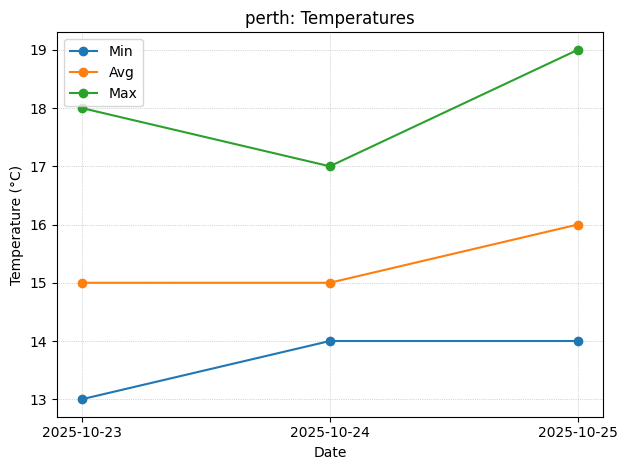

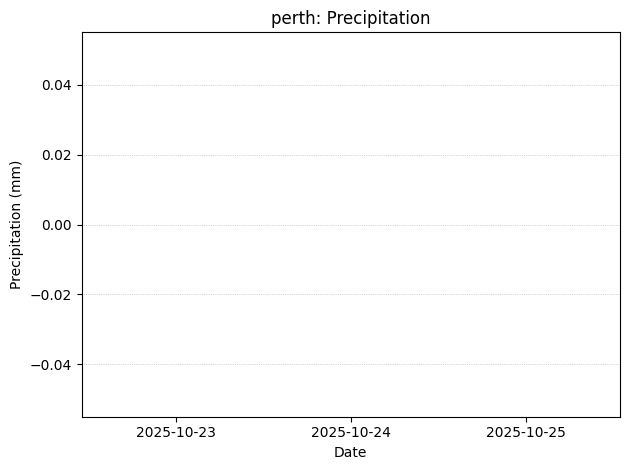


Menu:
1. Display current weather
2. Display forecast
3. View charts
4. Ask a weather question (uses simple NLP)
5. Change location
6. Exit


In [ ]:
import re
_WEATHER_ATTRS = {
    "temperature": ["temperature","temp","hot","cold","warm","cool","heat","°c","degrees"],
    "rain": ["rain","precip","precipitation","umbrella","shower","wet"],
    "wind": ["wind","breeze","gust","windspeed","kmph"],
    "humidity": ["humidity","humid"]
}
_TIME_WORDS = {
    "today": ["today","tonight","this day"],
    "tomorrow": ["tomorrow","tmr","tmrw","next day"],
    "week": ["this week","next 5 days","next week","coming days","7 days","five days"]
}
_LOCATION_RE = re.compile(r"(?:in|for|at)\s+([A-Za-z\s\-]+)$", re.I)

def parse_weather_question(question: str) -> dict:
    out = {"location": None, "time": "week", "attribute": None}
    if not question:
        return out
    q = question.strip().lower()
    for key, words in _TIME_WORDS.items():
        if any(w in q for w in words):
            out["time"] = key
            break
    for key, words in _WEATHER_ATTRS.items():
        if any(w in q for w in words):
            out["attribute"] = key
            break
    m = _LOCATION_RE.search(question.strip())
    if m:
        out["location"] = m.group(1).strip()
    return out

def _pick_slice(df, time_key: str):
    if df.empty:
        return df
    if time_key == "today":
        return df.iloc[:1]
    if time_key == "tomorrow":
        return df.iloc[1:2] if len(df) >= 2 else df.iloc[-1:]
    return df.iloc[:5] if len(df) >= 5 else df

def run_simple_agent(question: str, fallback_location: str):
    parsed = parse_weather_question(question)
    loc = parsed["location"] or fallback_location
    data = get_weather_data(loc, 5)
    if not data:
        return "Sorry, I could not find any weather right now."

    df = forecast_to_df(data)
    if df.empty:
        return f"Sorry, I do not have forecast data for {loc}."

    focus = _pick_slice(df, parsed.get("time","week"))
    if focus.empty:
        return f"Sorry, I do not have forecast data for {loc}."

    attr = parsed.get("attribute")
    if attr == "temperature":
        avg = focus["avg_temp_c"].mean()
        lo = focus["min_temp_c"].min()
        hi = focus["max_temp_c"].max()
        if len(focus) == 1:
            d = str(focus["date"].dt.date.iloc[0])
            return f"{loc} on {d}: about {avg:.0f}°C on average, {lo:.0f}°C low and {hi:.0f}°C high."
        return f"{loc} this period: average around {avg:.0f}°C, lows near {lo:.0f}°C and highs near {hi:.0f}°C."
    if attr == "rain":
        total = focus["precip_mm"].fillna(0).sum()
        max_day = focus["precip_mm"].fillna(0).max()
        return f"Rain in {loc}: total about {total:.1f} mm, heaviest day roughly {max_day:.1f} mm."
    if attr == "wind":
        wmax = focus["wind_kmph"].max()
        wavg = focus["wind_kmph"].mean()
        return f"Wind in {loc}: average near {wavg:.0f} km/h, gusts up to about {wmax:.0f} km/h."
    if attr == "humidity":
        h = focus["humidity"].mean()
        return f"Humidity in {loc}: around {h:.0f}% on average."

    row = focus.iloc[0]
    return f"In {loc}, expect around {row['avg_temp_c']:.0f}°C, lows near {row['min_temp_c']:.0f}°C, highs near {row['max_temp_c']:.0f}°C. Rain about {row['precip_mm'] or 0:.1f} mm."


# ---------- User Interface ----------
print("Welcome to Weather Advisor")

current_city = input("Enter a city name: ").strip()

while True:
    data = get_weather_data(location=current_city or "")
    print("\nMenu:")
    print("1. Display current weather")
    print("2. Display forecast")
    print("3. View charts")
    print("4. Ask a weather question (uses simple NLP)")
    print("5. Change location")
    print("6. Exit")
    choice = input("Enter your choice: ").strip()

    if choice == '1':
        display_current_weather(data)
    elif choice == '2':
        display_forecast(data)
    elif choice == '3':
        show_charts(data)
    elif choice == '4':
        question = input("Ask your question: ").strip()
        if question:
            response = run_simple_agent(question, fallback_location=current_city or "Perth")
            print("\nAdvisor:", response)
    elif choice == '5':
        current_city = input("Enter a new city name: ").strip()
    elif choice == '6':
        print("Goodbye!")
        break
    else:
        print("Invalid choice. Please try again.")

## 🧪 Testing and Examples

,date,max_temp,min_temp,condition,precipitation,wind
0,2025-10-22,9,5,Light rain,"{'chance': 100, 'amount': 2.0}","{'speed': 1, 'direction': 'NW'}"
1,2025-10-23,14,2,Patchy rain nearby,"{'chance': 89, 'amount': 0.0}","{'speed': 20, 'direction': 'W'}"
2,2025-10-24,15,4,Partly Cloudy,"{'chance': 0, 'amount': 0.0}","{'speed': 20, 'direction': 'W'}"


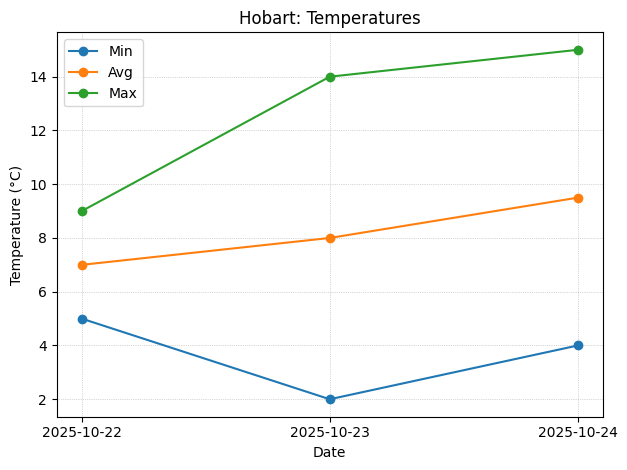

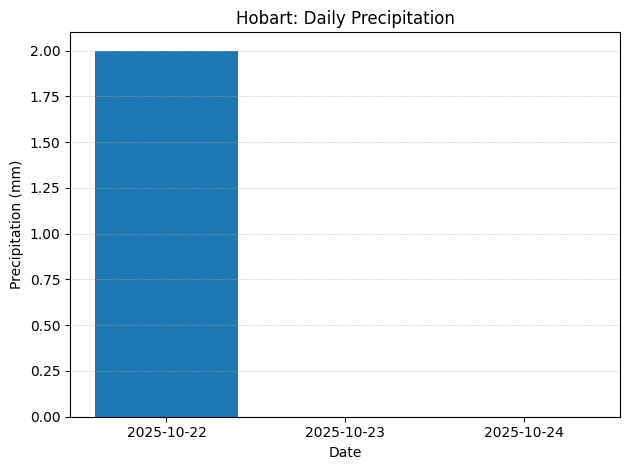

{'location': 'Hobart?', 'time': 'tomorrow', 'attribute': 'rain'}
 2025-10-23: 0–0°C


In [ ]:
# 1) Quick fetch + table
d = get_weather_data("Hobart", 5)
display(forecast_to_df(d))

# 2) Visuals
create_temperature_visualisation(d)
create_precipitation_visualisation(d)

# 3) NLP
q = "Will it rain tomorrow in Hobart?"
print(parse_weather_question(q))
print(generate_weather_response(parse_weather_question(q), d))

# 4) Menu (run manually if you want interactive)
# main("console")

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.